In [1]:
import os
os.chdir('..')
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

In [68]:
files = [os.path.join('data/comparison', folder) for folder in os.listdir('data/comparison')]
print(len(files))

60


In [ ]:
process = BranchingStochasticProcess()
process.load_data(files[0])
process.run_appex(downsample_rate=1000)
plt.plot(process.A_error)

15000
N traj 250 N time steps 15
iteration 0, running tolerance 10.0


In [ ]:
noise_strengths = [0.05, 0.1, 0.5, 1.0]
dims = [2, 5, 10, 20]
maxiters = 10
downsample_rate = 500
N_sample = 2*process.N_traj
A_errors = np.zeros((len(noise_strengths), len(dims), maxiters + 2))
H_errors = np.zeros((len(noise_strengths), len(dims), maxiters + 2))
results = {}

In [74]:
for file in files:
    if file in results.keys():
        continue
    process = BranchingStochasticProcess()
    process.load_data(file)
    process.run_appex(downsample_rate=downsample_rate, maxiters=maxiters, print_out=1, N_sample=N_sample)
    i = noise_strengths.index(process.G[0, 0])
    j = dims.index(process.d)
    A_errors[i, j, :] = process.A_error
    H_errors[i, j, :] = process.A_error
    np.save('grit_vs_appex/APPEX_A_errors.npy', A_errors)
    np.save('grit_vs_appex/APPEX_H_errors.npy', H_errors)
    results[file] = {
        'A_error': process.A_error[-1],
        'H_error': process.H_error[-1],
        'A': process.A,
        'G': process.G,
        'A_est': process.A_est,
        'H_est': process.H_est,
        'd': process.d,
        'noise_strength': process.G[0, 0],
        'maxiters': maxiters,
        'N_sample': N_sample,
        'N_traj': process.N_traj,
        'downsample_rate': downsample_rate
    }


15000
N traj 250 N time steps 30
iteration 0, running tolerance 5.0
iteration 1, running tolerance 1.0965075104656121
iteration 2, running tolerance 0.03334112317858406
iteration 3, running tolerance 0.028824208466866716
iteration 4, running tolerance 0.025585512752954138
iteration 5, running tolerance 0.030921014646454276
iteration 6, running tolerance 0.019129822630844694
iteration 7, running tolerance 0.03329933536608481
iteration 8, running tolerance 0.02135766042575631
iteration 9, running tolerance 0.022702715305519882
15000
N traj 250 N time steps 30
iteration 0, running tolerance 5.0
iteration 1, running tolerance 1.2624951051932054
iteration 2, running tolerance 0.02221143991389323
iteration 3, running tolerance 0.03187271136304275
iteration 4, running tolerance 0.026944028607484412
iteration 5, running tolerance 0.02496955477144584
iteration 6, running tolerance 0.028811833136359363
iteration 7, running tolerance 0.023545574240487418
iteration 8, running tolerance 0.019061268

In [36]:
np.save('grit_vs_appex/APPEX_A_errors_final.npy', A_errors)
np.save('grit_vs_appex/APPEX_H_errors_final.npy', H_errors)

In [76]:
rdict = {}
for file, result in results.items():
    rdict[file] = {
        'A_error': result['A_error'].astype(float),
        'H_error': result['H_error'].astype(float),
        'A': result['A'].tolist(),
        'G': result['G'].tolist(),
        'A_est': result['A_est'].tolist(),
        'H_est': result['H_est'].tolist(),
        'd': int(result['d']),
        'noise_strength': result['noise_strength'].astype(float),
        'maxiters': int(result['maxiters']),
        'N_sample': int(result['N_sample']),
        'N_traj': int(result['N_traj']),
        'downsample_rate': int(result['downsample_rate'])
    }

In [77]:
import json
file_path = "grit_vs_appex/results2.json"
with open(file_path, 'w') as json_file:
    json.dump(rdict, json_file)

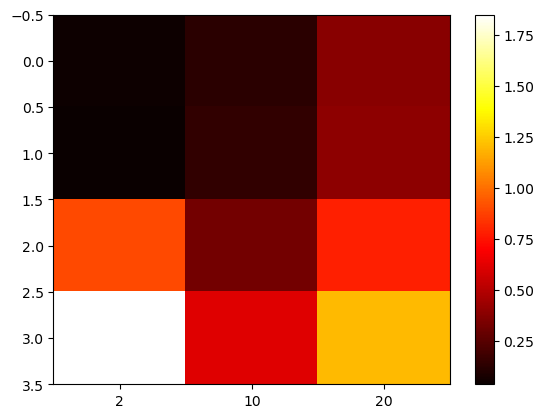

In [52]:
plt.imshow(A_errors[:, :, -1], aspect='auto', cmap='hot')
plt.xticks(range(len(dims)), dims)
plt.colorbar()